## Importing the libraries

3. Data cheak to perform
.cheak missing values
.cheak duplicates
.cheak data types
.cheak the number of unique values of each column
.cheak statistics of the data set
.cheak various categories present in the different categorica column

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


## Importing the dataset

In [4]:
df=pd.read_csv(r'C:\Users\SANDEEP SEKHAR\projectA\notebook\data\raw.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,delhi,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,bangalore,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.describe()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,62397.405202,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000


In [26]:
df.duplicated().sum()

0

In [25]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Balance            6382
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [23]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
drop1=['RowNumber','CustomerId','Surname','Tenure','NumOfProducts']
df.drop(columns=drop1,inplace=True)

In [22]:
df.head(10)

,CreditScore,Geography,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,delhi,Female,42,0.00,1,1,101348.88,1
1,608,bangalore,Female,41,83807.86,0,1,112542.58,0
2,502,delhi,Female,42,159660.80,1,0,113931.57,1
3,699,delhi,Female,39,0.00,0,0,93826.63,0
4,850,bangalore,Female,43,125510.82,1,1,79084.10,0
5,645,bangalore,Male,44,113755.78,1,0,149756.71,1
6,822,delhi,Male,50,0.00,1,1,10062.80,0
7,376,mumbai,Female,29,115046.74,1,0,119346.88,1
8,501,delhi,Male,44,142051.07,0,1,74940.50,0
9,684,delhi,Male,27,134603.88,1,1,71725.73,0


In [28]:
df.shape

(10000, 9)

In [29]:
print("categories in 'Geography' variable:",end=" " )
print(df['Geography'].unique())

print("categories in 'Gender' variable:",end=" " )
print(df['Gender'].unique())

categories in 'Geography' variable: ['delhi' 'bangalore' 'mumbai']
categories in 'Gender' variable: ['Female' 'Male']


In [33]:
#define numerical and categorical column
numeric_feature= [feature for feature in df.columns if df[feature].dtype !='object']
categorical_feature=[feature for feature in df.columns if df[feature].dtype =='object']

#print column
print('we have {} numerical features : {}'.format(len(numeric_feature),numeric_feature))
print('\nwe have {} categorical features : {}'.format(len(categorical_feature),categorical_feature))

we have 7 numerical features : ['CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

we have 2 categorical features : ['Geography', 'Gender']


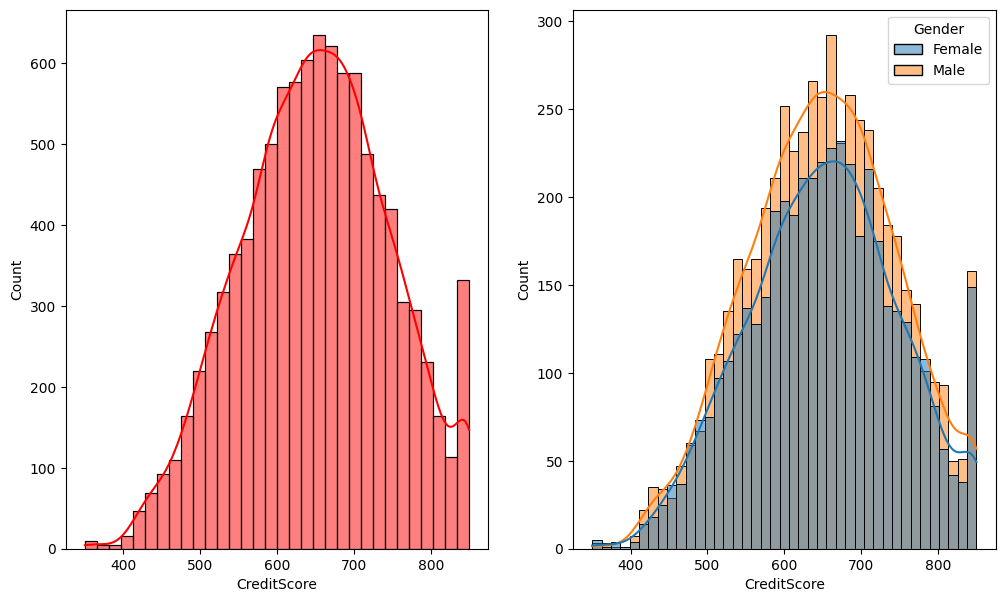

In [40]:
fig,axs=plt.subplots(1,2,figsize=(12,7))
plt.subplot(121)
sns.histplot(data=df,x='CreditScore',bins=32,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='CreditScore',hue='Gender',kde=True)
plt.show()

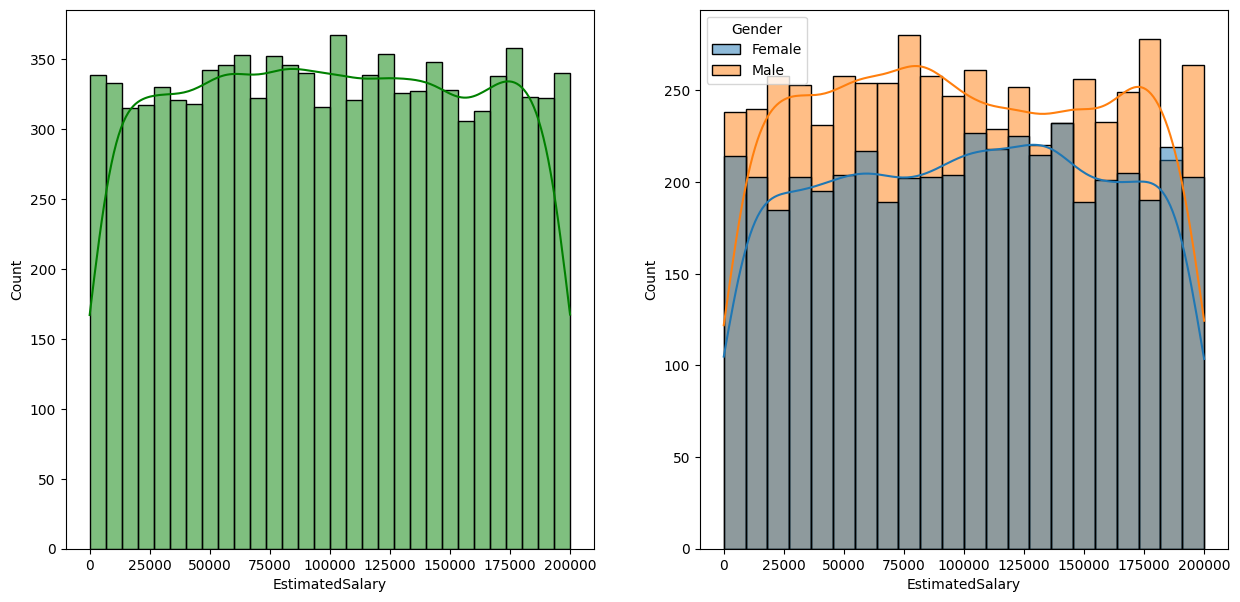

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='EstimatedSalary',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='EstimatedSalary',kde=True,hue='Gender')
plt.show()

insights
1.male has more sestimated salary


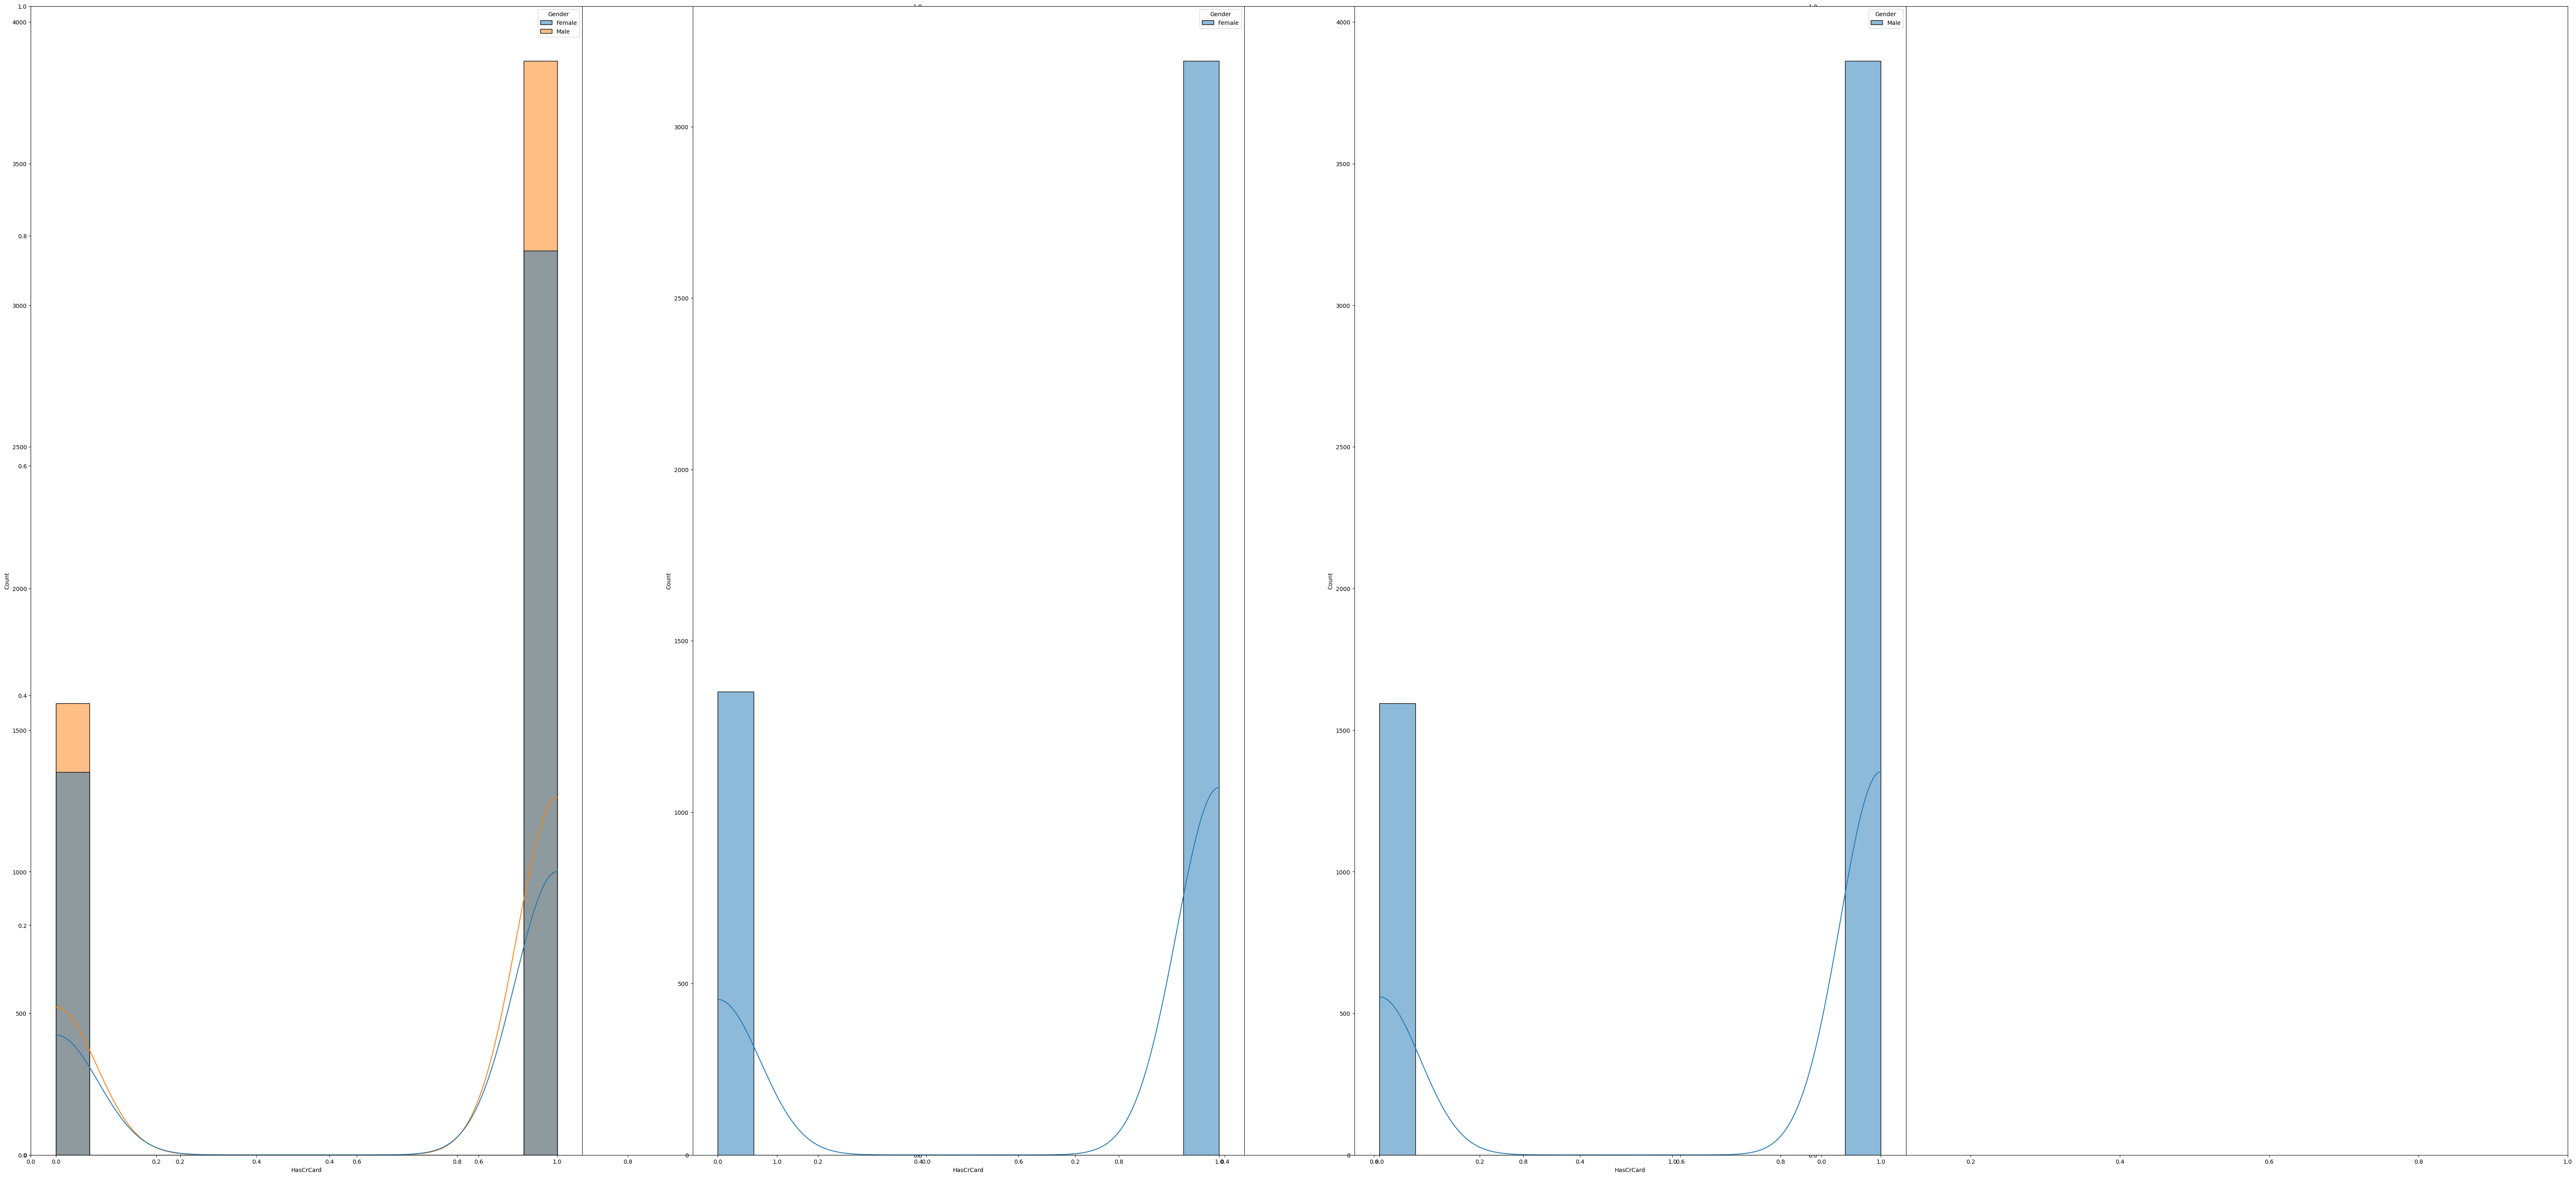

In [47]:
plt.subplots(1,3,figsize=(79,36))
plt.subplot(141)
sns.histplot(data=df,x='HasCrCard',kde=True,hue='Gender')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='Female' ],x='HasCrCard',kde=True,hue='Gender')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='Male'],x='HasCrCard',kde=True,hue='Gender')
plt.show()

## Encoding categorical data

### Label Encoding the "Gender" column

## Splitting the dataset into the Training set and Test set

## Training XGBoost on the Training set

## Predicting the Test set results

## Making the Confusion Matrix

## Applying k-Fold Cross Validation